**Importation des Bibliothèques**

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

**Importation du Dataset**

In [103]:
data= pd.read_csv('heart.csv')

In [104]:
print(data)

     age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0     63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1     37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2     41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3     56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4     57    0   0       120   354    0  ...      1      0.6      2   0     2       1
..   ...  ...  ..       ...   ...  ...  ...    ...      ...    ...  ..   ...     ...
298   57    0   0       140   241    0  ...      1      0.2      1   0     3       0
299   45    1   3       110   264    0  ...      0      1.2      1   0     3       0
300   68    1   0       144   193    1  ...      0      3.4      1   2     3       0
301   57    1   0       130   131    0  ...      1      1.2      1   1     3       0
302   57    0   1       130   236    0  ...      0      0.0      

In [105]:
C1=['age']

In [106]:
moy=np.mean(data[C1])

In [107]:
print(moy)

age    54.366337
dtype: float64


**Dataset Cleaning**

In [108]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Dataset visualization**

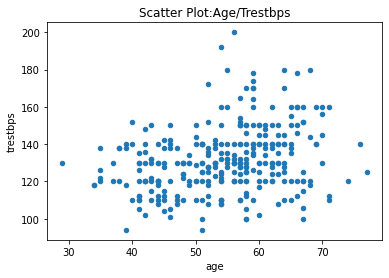

In [109]:
data.plot.scatter(x='age', y='trestbps', title='Scatter Plot:Age/Trestbps')

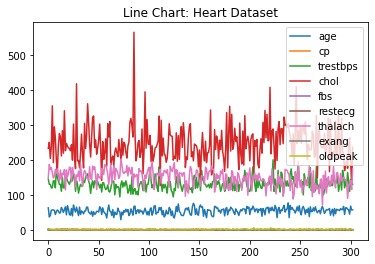

In [110]:
data.drop(['target','thal','sex','ca','slope'], axis=1).plot.line(title='Line Chart: Heart Dataset')

Text(0, 0.5, 'chol')

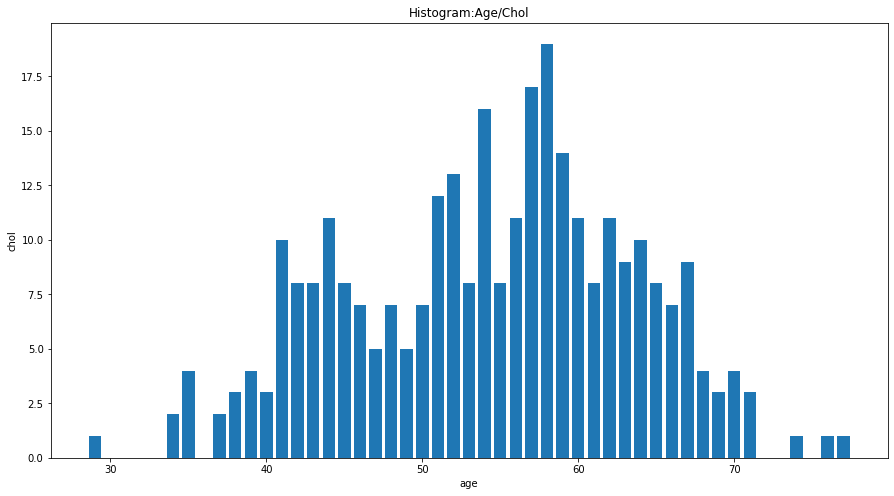

In [111]:
# create a figure and axis 
fig, ax = plt.subplots(figsize=(15, 8)) 
# count the occurrence of each class 
d = data['age'].value_counts() 
# get x and y data 
age = d.index 
chol = d.values 
# create bar chart 
ax.bar(age, chol) 
# set title and labels 
ax.set_title('Histogram:Age/Chol') 
ax.set_xlabel('age') 
ax.set_ylabel('chol')

**Building a  machine learning model**

Data splitting

In [112]:
X = data.drop(['target'], axis=1)
y = data['target']
y = data.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

Logistic Regression

*Model building*

In [113]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

*Model performance*

- Evaluating Regression Models:


1. R-Squared

In [115]:
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

2. Mean Squared Error

In [116]:
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)

In [117]:
print(lr_train_mse)

0.1446280991735537


3. Predicting Data

In [118]:
y_pred = lr.predict(X_test)
print(y_pred)

[0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0]


In [119]:
lr_results = pd.DataFrame(['Logistic regression',lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

4. Test Accuracy




In [120]:
print('Accuracy of logistic regression classifier on test set: {:.2f}%'.format(lr.score(X_test, y_test)*100.0))

Accuracy of logistic regression classifier on test set: 88.52%


5. Confusion Matrix

In [121]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[25  4]
 [ 3 29]]


6. Roc Curve



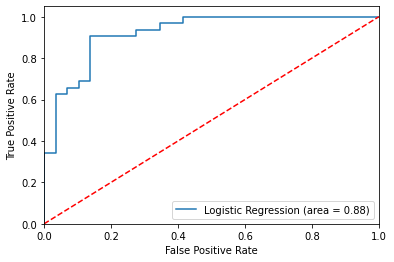

In [122]:
lr_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('LR_ROC')
plt.show()